# SciPy Essentials

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%config InlineBackend.figure_format = 'svg'

A lot of the **scipy** material is built on top of **numpy** and it comprises a lot of extremely optimized functions for numerical computing that are commonly used across all branches of mathematics, physics, engineering, and many other fields. The **scipy** library is built to work with **numpy** arrays and provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization.

## Basics

### Optimization

Minimize the function $f(x) = (x - 3)^2$ 

In [3]:
from scipy.optimize import minimize

def f(x):
    return (x-3)**2

initial_guess = 2
res = minimize(f, initial_guess)
print(res)

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])


Minimize the function $f(x,y) = (x - 1)^2 + (y - 2.5)^2$ subject to the constraints

$x - 2y + 2 \geq 0$

$ -x - 2y + 6 \geq 0$

$ -x + 2y + 2 \geq 0$

$x \geq 0$

$y \geq 0$

Here's the approach to use for constrained optimization:

+ 2D function takes in vector $x$
+ Constraints must be specified as $g_i(x) \geq 0$
+ Bounds must be specified as rectangular regions

In [4]:
#f = lambda x: (x[0] -1)**2 + (x[1] - 2.5)**2

def f(v):
    return (v[0] -1)**2 + (v[1] - 2.5)**2

cons1 = lambda v: v[0] - 2*v[1] + 2
cons2 = lambda v: -v[0] - 2*v[1] + 6
cons3 = lambda v: -v[0] + 2*v[1] + 2
constr = ({'type': 'ineq', 'fun': cons1},
               {'type': 'ineq', 'fun': cons2},
               {'type': 'ineq', 'fun': cons3},
               ) # tuple of dictionaries defining the inequality constraints
bnds = ((0, None), (0, None)) # tuple of two tuples going from 0 to infinity each

res = minimize(f, (2, 0), bounds=bnds, constraints=constr)
print(res)

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])


You can look at the documentation for any function using the `?` operator.

In [5]:
#minimize?

## Interpolation

SciPy provides a number of functions for interpolation, which are extremely useful for experimental data analysis. 

Suppose you have a set of data points like this:

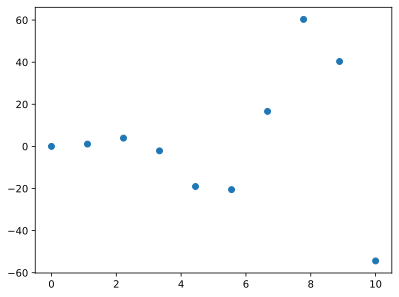

In [6]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x, y)

Your goal is to know all the values in between the scattered points. You can use the `interp1d` function to interpolate the data.

In [7]:
from scipy.interpolate import interp1d

In [8]:
f = interp1d(x, y, kind='cubic') # way better than linear!
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)

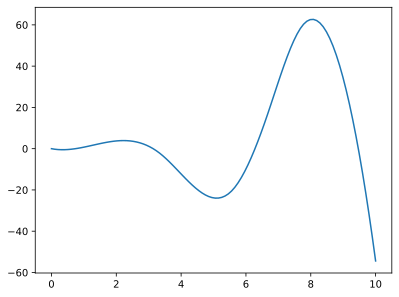

In [9]:
plt.plot(x_dense, y_dense)

## Curve Fitting

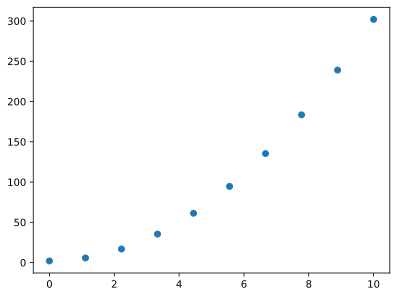

In [10]:
# Trivial example
x_data = np.linspace(0, 10, 10)
y_data = 3 * x_data**2 + 2
plt.scatter(x_data, y_data)

Given the obvious shape of the dataset, we can assume it can be fit by the curve $y = ax^2 + b$, using the `curve_fit` function. This is a trivial example, but it illustrates the basic idea of curve fitting, which can be useful in more complicated situations.

In [11]:
from scipy.optimize import curve_fit

def f(x, a, b):
    return a*x**2 + b

p_optimal, p_covariance = curve_fit(f, x_data, y_data, p0=(1,1))

print(p_optimal)       # returns the optimal a and b values for fitting
print(p_covariance)    # returns the error in terms of covariance

[3. 2.]
[[ 4.13297331e-34 -1.45419433e-32]
 [-1.45419433e-32  9.65872308e-31]]


Let's see a more physical example. The equation for spring motion is $y(t) = A \cos(\omega t + \phi)$, where $A$ is the amplitude, $\omega$ is the angular frequency, and $\phi$ is the phase shift. 

Assume you've collected the following experimental data: 

In [12]:
t_data = np.array([0.00000000e+00, 3.44827586e-01, 6.89655172e-01, 1.03448276e+00,
       1.37931034e+00, 1.72413793e+00, 2.06896552e+00, 2.41379310e+00,
       2.75862069e+00, 3.10344828e+00, 3.44827586e+00, 3.79310345e+00,
       4.13793103e+00, 4.48275862e+00, 4.82758621e+00, 5.17241379e+00,
       5.51724138e+00, 5.86206897e+00, 6.20689655e+00, 6.55172414e+00,
       6.89655172e+00, 7.24137931e+00, 7.58620690e+00, 7.93103448e+00,
       8.27586207e+00, 8.62068966e+00, 8.96551724e+00, 9.31034483e+00,
       9.65517241e+00, 1.00000000e+01])

y_data = np.array([ 4.33039530e+00,  1.61137995e+00, -2.15418696e+00, -3.90137249e+00,
       -1.67259042e+00,  2.16884383e+00,  3.86635998e+00,  1.85194506e+00,
       -1.84892240e+00, -3.96560495e+00, -2.13385255e+00,  1.59425817e+00,
        4.06145238e+00,  1.89300594e+00, -1.76870297e+00, -4.26791226e+00,
       -2.46874133e+00,  1.37019912e+00,  4.24945607e+00,  2.27038039e+00,
       -1.56299303e+00, -3.46774049e+00, -2.50845488e+00,  1.20022052e+00,
        3.81633703e+00,  2.91511556e+00, -1.24569189e+00, -3.72716214e+00,
       -2.54549857e+00,  8.72625481e-01])


A very common parameter that you might want to study is the **natural frequency** of oscillation. Given that the general equation for a harmonic oscillator is exactly the same as the equation for a spring, you can use the same curve fitting technique to find the frequency of oscillation.

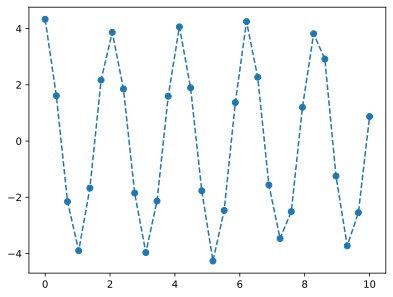

In [13]:
plt.plot(t_data, y_data, 'o--')

The angular frequency is $\omega = 2 \pi f$, so the frequency is $f = \frac{\omega}{2 \pi}$. We also know that the frequency is the reciprocal of the period, so we can write $f = \frac{1}{T}$. 

As evident from plotting the raw data, the period is roughly 2 seconds, so $T \approx 2$ s, $f \approx 0.5$ Hz and $\omega \approx \pi$ rad/s

The amplitude is the maximum displacement of the spring, which is $A \approx 4$ m, whereas the phase shift is $\phi \approx 0$.

All these values can be used as an initial guess for the curve fitting algorithm.

In [14]:
def func(t, A, omega, phi):
    return A * np.cos(omega*t + phi)
A0 = 4
omega0 = np.pi 
phi0 = 0
p0 = (A0, omega0, phi0)
p_opt, p_cov = curve_fit(func, t_data, y_data, p0)
print(p_opt)
print(p_cov)
A, omega, phi = p_opt

[3.94980912 2.99917741 0.10412397]
[[ 2.65327850e-03 -5.03106997e-06  3.52730942e-05]
 [-5.03106997e-06  1.87942942e-05 -9.72687363e-05]
 [ 3.52730942e-05 -9.72687363e-05  6.71660143e-04]]


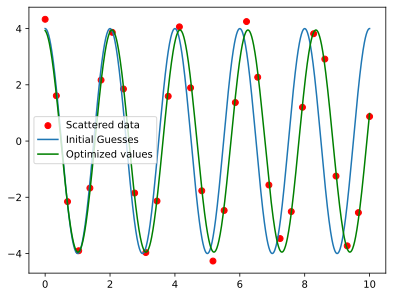

In [15]:
t_dense = np.linspace(0, 10, 1000)
y_dense = func(t_dense, A0, omega0, phi0) # using the initial guesses over a denser t span
Y_dense = func(t_dense, A, omega, phi)    # using the optimized values found by curve fit
plt.scatter(t_data, y_data, color='red')
plt.plot(t_dense, y_dense)
plt.plot(t_dense, Y_dense, color='green')
plt.legend(['Scattered data','Initial Guesses', 'Optimized values'])

In [16]:
# p_cov is the covariance matrix and its diagonal (the variance) is the squared error on the given arguments (A, omega, phi)

err = np.sqrt(np.diag(p_cov))
err # error, or actually standard deviation

array([0.05150998, 0.00433524, 0.02591641])

This example is a testament to how important it is to visualize your data before you start fitting it and to feed the algorithm a good initial guess.

Try the same example by using 1 as the initial guess for omega.

## Special Functions

Legendre polynomials are orthogonal polynomials of degree $n$ on the interval $[-1,1]$. They satisfy the following recurrence relation:

$P_l(x): (1-x^2)y'' - 2xy' + l(l+1)y = 0$

They are used in many applications, as an example you can find the angular component of the spherical Schrödinger equation which permits non-infinite solutions to the Schrödinger equation for the hydrogen atom.

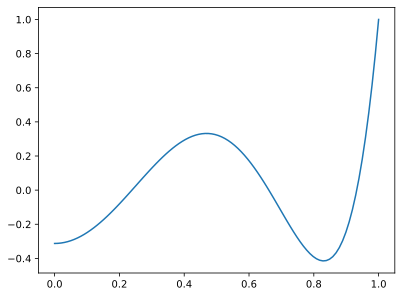

In [17]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))

Bessel functions: $J_\alpha(x)$: $x^2y'' + xy' + (x^2 - \alpha^2)y = 0$

Bessel functions are a family of solutions to the Bessel differential equation. They are used in many applications, as an example you can evaluate Laplace's equation in Polar Coordinates.

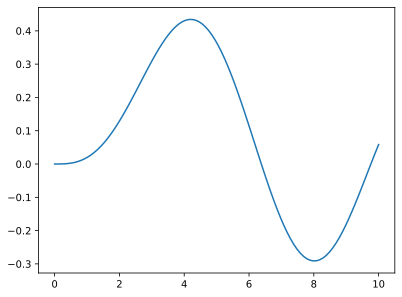

In [18]:
from scipy.special import jv 
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3, x))

## Calculus

### Differentiation

A very interesting consideration about derivation in **SciPy** is that it uses a different approach to differentiation compared to **NumPy**, where the most common function is `np.gradient`, which computes derivatives using finite differences.

On the other hand, **SciPy** provides more advanced differentiation methods, such as the central difference formula, which provides a more accurate estimate of the derivative. In addition to this, the optimized routines in **SciPy** generally lead to better results and fsster convergence.

In [19]:
from scipy.misc import derivative

In [20]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

x = np.linspace(0, 1, 100)

The **SciPy** approach is more useful when working with explicitly defined functions, as it allows you to compute derivatives of functions that are not defined at a point, whereas the **NumPy** approach is more useful when working with data points stored in arrays.

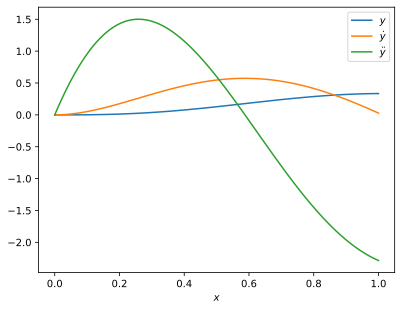

In [32]:
y = f(x)
dx = 1e-6
ydot = derivative(f, x, dx)
yddot = derivative(f, x, dx, n = 2)
plt.plot(x, y)
plt.plot(x, ydot)
plt.plot(x, yddot)
plt.xlabel("$x$")
plt.legend(['$y$', '$\dot{y}$', '$ \ddot{y}$'])

## Integration

Integration in **SciPy** is similar to differentiation, in that it provides more advanced integration methods compared to **NumPy**.
For instance in **NumPy** you can use the `np.trapz` function to compute the integral of a function using the trapezoidal rule, or the cumulative sum of an array using the `np.cumsum` function, multiplying the result by the step size. 

The `np.trapz` in particular uses the trapezoidal rule with an even number of points, and the Simpson's rule with an odd number of points. 
Both numpy routines are very fast and striaghtforward, but their limitation is that they only work with evenly spaced data points. 

In contrast, **SciPy**'s integration module provides a more comprehensive set of integration functions, including `quad`, `quadrature`, 
`romberg`, `cumulative_trapezoid`, `trapz`, and more. 

These function support a wider range of integration techinques, including adaptive quadrature, Romberg integration and Gaussian quadrature.

They also offer more flexibility in terms of the types of data they can handle, as they can work with unevenly spaced data points, not well-behaved functions, and functions that are not defined at a point. 

Single integrals:  $\displaystyle\int_0^1 x^2 sin(2x) e^{-x} dx$

In [37]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
bnds = (0, 1)
integral, integral_error = quad(integrand, bnds[0], bnds[1])
print(integral)
print(integral_error)

0.14558175869954834
1.6162822047366225e-15


Double integrals: $\displaystyle\int_0^1 \int_{-x}^{x^2} \sin(x + y^2)dydx$

In [41]:
from scipy.integrate import dblquad
integrand = lambda x, y: np.sin(x + y**2)
bnds_y = ((lambda x: -x), (lambda x: x))
bnds_x = (0, 1)
integral, integral_error = dblquad(integrand, bnds_x[0], bnds_x[1], bnds_y[0], bnds_y[1])
print(integral)
print(integral_error)

0.4113285456776755
1.5656549454840436e-14


You can integrate up to an arbitrary number of dimensions, using the `nquad` routine.

In [44]:
from scipy.integrate import nquad
#nquad?

## Differential Equations

### **First Order ODEs**

Let's see an example of a first order ODE with the equation of free falling motion under air friction:
$\dot{v} - \alpha v^2 + \beta = 0$

with the initial condition $v(0) = 0$.

In [45]:
from scipy.integrate import odeint

In [46]:
# Let's set alpha and beta arbitrarily for this example
alpha = 3
beta = 5

def vdot(v, t): 
    return alpha * v**2 - 5

v0 = 0 


In [47]:
t = np.linspace(0, 1, 100) # time span for which the equation is solved
sol = odeint(vdot, v0, t)
print(sol)

[[ 0.        ]
 [-0.05047933]
 [-0.10080451]
 [-0.15082334]
 [-0.20038726]
 [-0.24935318]
 [-0.29758502]
 [-0.34495519]
 [-0.39134576]
 [-0.43664948]
 [-0.48077056]
 [-0.52362515]
 [-0.56514164]
 [-0.60526086]
 [-0.6439356 ]
 [-0.68113064]
 [-0.71682205]
 [-0.75099661]
 [-0.78365109]
 [-0.8147914 ]
 [-0.84443176]
 [-0.87259378]
 [-0.89930556]
 [-0.92460079]
 [-0.94851787]
 [-0.97109913]
 [-0.99239002]
 [-1.01243837]
 [-1.03129376]
 [-1.04900692]
 [-1.06562918]
 [-1.081212  ]
 [-1.0958066 ]
 [-1.10946355]
 [-1.12223249]
 [-1.13416195]
 [-1.14529906]
 [-1.15568941]
 [-1.16537698]
 [-1.17440397]
 [-1.18281086]
 [-1.19063623]
 [-1.19791686]
 [-1.20468768]
 [-1.21098179]
 [-1.21683053]
 [-1.22226349]
 [-1.22730856]
 [-1.23199199]
 [-1.23633849]
 [-1.24037122]
 [-1.24411192]
 [-1.24758094]
 [-1.25079735]
 [-1.25377896]
 [-1.25654241]
 [-1.25910322]
 [-1.2614759 ]
 [-1.26367394]
 [-1.26570992]
 [-1.26759557]
 [-1.26934179]
 [-1.27095869]
 [-1.27245574]
 [-1.27384168]
 [-1.27512464]
 [-1.27631

In [48]:
# The form might look weird but it makes sense for more variables, let's get the result in a more readable structure
sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

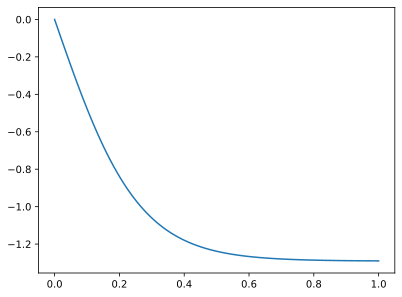

In [49]:
plt.plot(t, sol.T[0])

### **Coupled First Order ODEs**

$y_1' = y_1 + y_2^2 + 3x \ \ \ \ \ \ \ \ \ \ \ \ \ \ y_1(0) = 0$

$y_2' = 3y_1 + y_2^3 - \cos(x) \ \ \ \ \ \ y_2(0) = 0$

Letting $S = (y_1, y_2)$, we need a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$.

In [52]:
def Sdot(S, x):
    y1, y2 = S 
    return [y1 + y2**2 + 3*x, 
           3*y1 + y2**3 - np.cos(x)]

y1_0 = 0
y2_0 = 0

S_0 = (y1_0, y2_0)

In [55]:
x = np.linspace(0, 1, 100)
sol = odeint(Sdot, S_0, x)
y1 = sol.T[0]
y2 = sol.T[1]

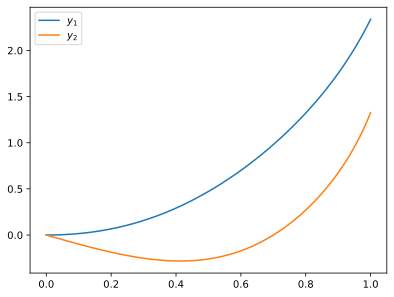

In [56]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['$y_1$', '$y_2$'])

Remember that any N order ODE can be converted into a system of N first order coupled ODEs, so this approach is extremely useful!

### **Second Order ODEs**

Equation for a pendulum: $\ddot{\theta} - \sin(\theta) = 0$

This can be in fact solved as a system of two first order ODEs. 

By knowing that $\omega = \dot{\theta}$, we can rewrite the equation as follows:

$\dot{\theta} = \omega$

$\dot{\omega} = \sin(\theta)$

In [57]:
t = np.linspace(0, 20, 100)
theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)
def Sdot(S, t):
    theta, omega = S
    return [omega, np.sin(theta)]

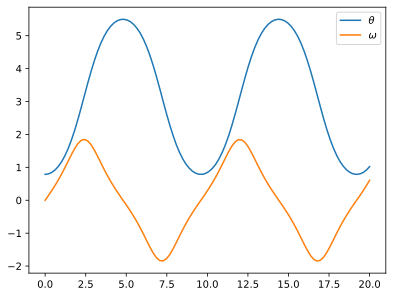

In [59]:
sol = odeint(Sdot, S0, t)
theta, omega = sol.T
plt.plot(t, theta)
plt.plot(t, omega)
plt.legend([r'$\theta$', r'$\omega$'])

## Fourier Transforms

The discrete Fourier transform (DFT) is defined as:

$y[k] = \displaystyle\sum_{n=0}^{N-1} e^{-2\pi i n (k/N)} x[n]$

+ $k/N$ is a normalized frequency (dimensionless)
+ By knowing the sampling spacing in x, you can convert the normalized frequency to a frequency in Hz

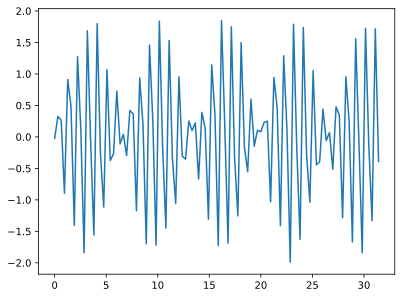

In [70]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*t) + np.sin(4*np.pi*t) + 0.1*np.random.randn(len(t))
plt.plot(t, x)

Text(0.5, 1.0, 'Power peaks over a range of positive frequencies')

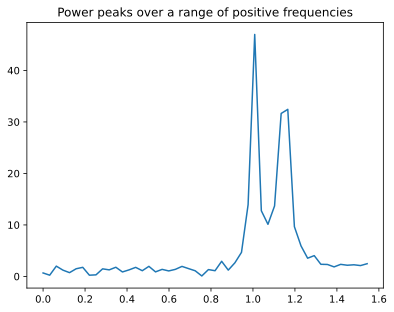

In [78]:
from scipy.fft import fft, fftfreq 
N = len(x)
y = fft(x)[:N//2]
f = fftfreq(N, np.diff(t)[0])[:N//2]
plt.plot(f, np.abs(y))
plt.title('Power peaks over a range of positive frequencies')

### **Examples**

**Example1**. The energy required to get from point $\vec{r_1}$ to point $\vec{r_2}$ is given by:

$ E = \alpha \displaystyle\int_C \left|{\frac{d\vec{r}}{dt}}\right| dt - \displaystyle\int_C \vec{F} \cdot \frac{d\vec{r}}{dt} dt$

Suppose that $\alpha = 5$ and our start and end points are $\vec{r_1} = (0,0)$ and $\vec{r_2} = (0,10)$. On this particular day, the wind produced a force field $\vec{F} = (0, -2/(x + 1)^2)$.

Find the optimal value of $A$ in $\vec{r}(t) = A \sin(\pi t/10)\hat{x} + t\hat{y}$ that minimizes the work. 

Then $x = A \sin(\pi t/10)$ and $y = t$, and 

$\displaystyle\left|{\frac{d\vec{r}}{dt}}\right| = \sqrt{1 + (\pi A/10)^2 \cos^2(\pi t/10)}$

$\vec{F} \cdot \displaystyle\frac{\vec{dr}}{dt} = \begin{bmatrix} 0 \\ -2/(A \sin(\pi t/10) + 1)^2 \end{bmatrix} \cdot \begin{bmatrix} \pi A/10 \cos(\pi t/10) \\ 1 \end{bmatrix} = -2/(A \sin(\pi t/10) + 1)^2$

so that 

$E = \displaystyle\int_0^{10} \left(5 \displaystyle\sqrt{1 + (\pi A/10)^2 \cos^2(\pi t/10)} + \frac{2}{(A \sin(\pi t/10) + 100)^2}\right) dt$


In [82]:
def f(A):
    integrand = lambda t: 2 / (100 + A * np.sin(np.pi * t /10)**2 + 5 * np.sqrt(1 + (np.pi * A/10)**2 * (np.cos(np.pi * t/10)**2)))
    return quad(integrand, 0, 10)[0]
initial_guess = 0.001
minimize(f, initial_guess).x

array([1399.59713698])

**Example2**. Newton's law of cooling states that the rate of cooling of a body is proportional to the difference between the body's temperature and the ambient temperature. It can be written as:

$\displaystyle\frac{dT}{dt} = -k(T - T_s(t))$

where $T$ is the temperature of the body, $T_s$ is the surrounding's temperature, which can be a function of time, and $k$ is a constant.

In [83]:
t_m = np.array([0.0, 1.04347826, 2.08695652, 3.13043478, 4.17391304,
                5.2173913 , 6.26086957, 7.30434783, 8.34782689, 9.39130435,
                10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
                15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
                20.86956522, 21.91304348, 22.95652174, 24.0])

temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
                   291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
                   302.1566609, 303.0363689, 303.0363609, 302.1566609, 300.5430675,
                   298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
                   287.8603625, 286.2259041, 284.6945461, 283.2322975])


Text(0, 0.5, 'Temperature [K]')

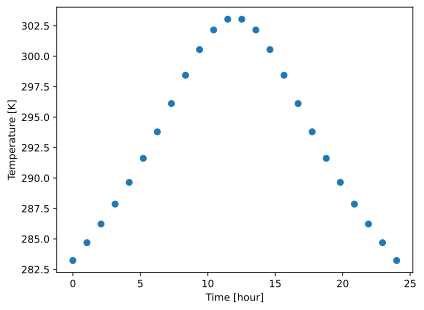

In [84]:
plt.scatter(t_m, temp_m)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

$T_s$ is a function of time, since we have scattered points (supposedly measurements of the environment temperature at various intervals of the day), the function can be obtained by interpolating the data points.

Text(0, 0.5, 'Temperature [K]')

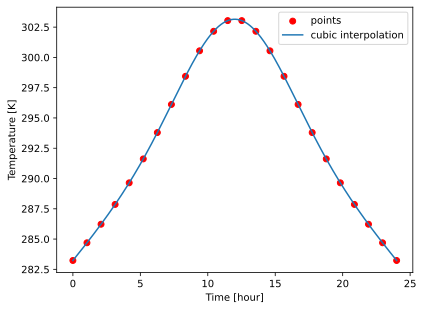

In [108]:
Ts = interp1d(t_m, temp_m, kind='cubic')
t_dense = np.linspace(t_m.min(), t_m.max(), 1000)
plt.scatter(t_m, temp_m, color='red')
plt.plot(t_dense, Ts(t_dense))
plt.legend(['points', 'cubic interpolation'])
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [113]:
def Tdot(T, t):
    return -0.5 * (T - Ts(t))
times = np.linspace(1, 23, 1000)
T0 = 284.6973843

The equation to solve for $T$ is an ODE of the first order, for which we guessed an initial value. It can represent for instance the temperature of a shallow lake, where the temperature of the water is proportional to the temperature of the air. 

In [114]:
sol = odeint(Tdot, T0, times).T[0]

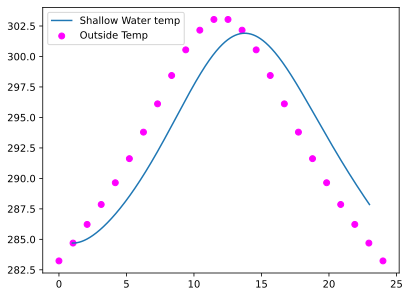

In [116]:
plt.plot(times, sol, label='Shallow Water temp')
plt.scatter(t_m, temp_m, color='magenta', label='Outside Temp')
plt.legend()

The result remarks that the temperature of the water is proportional to the temperature of the air, but with a time delay.

## Linear Algebra

### Basics

Triangular matrices 

$\begin{bmatrix} 3 & 0 & 0 & 0 \\ 2 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 4 \\ 2 \\ 4 \\ 2 \end{bmatrix}$

In [117]:
from scipy.linalg import solve_triangular 
a = np.array([[3,0,0,0], 
              [2,1,0,0],
              [1,0,1,0],
              [1,1,1,1]])
b = np.array([4,2,4,2])
x = solve_triangular(a,b, lower=True)
print(x)

[ 1.33333333 -0.66666667  2.66666667 -1.33333333]


Toepliz Matrices (constant diagonals)

$T = \begin{bmatrix} 1 & -1 & 2 & 3 \\ 3 & 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 1 \\ 2 \\ 2 \\ 5 \end{bmatrix}$ 

Toeplitz matrices can be univoquely defined by the first row and the first column.

In [119]:
from scipy.linalg import solve_toeplitz, toeplitz
c = np.array([1,3,6,10]) # First column of T
r = np.array([1,-1,2,3]) # First row of T
b = np.array([1,2,2,5])
x = solve_toeplitz((c,r), b)
print(x)

[ 0.17741935  0.48387097 -0.0483871   0.46774194]


### Eigenvalues Problems

Eigenvalue problems can be solved by using *NumPy*, which has built-in routines such as `eig` and `eigvals`. However, **SciPy** has a more complete set of routines, which are very useful for solving large problems and optimization problems.

In [120]:
from scipy.linalg import eigh_tridiagonal

$ \begin{bmatrix} 3 & -1 & 0 & 0 \\ -1 & 3 & -1 & 0 \\ 0 & -1 & 3 & -1 \\ 0 & 0 & -1 & 3 \end{bmatrix} \vec{x} = \lambda \vec{x}$

In [127]:
d = 3 * np.ones(4)
supd = -1 * np.ones(3)
infd = -1 * np.ones(3)
A = np.diag(d) + np.diag(supd, 1) + np.diag(infd, -1)

w, v = eigh_tridiagonal(d, supd)

In [128]:
A

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

### Special Matrices

Fiedler matrix (symmetric, positive definite, tridiagonal) $A_{ij} = \left| a_i - a_j \right|$ where $a_i$ is some sequence of numbers.

In [129]:
from scipy.linalg import fiedler 
fiedler([1, 4, 12, 45])

array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])

Toeplitz matrices (constant diagonals)

In [130]:
toeplitz([1, 2, 3, 6, 0, 0], [1, 3, 4, 10, 6, 6])

array([[ 1,  3,  4, 10,  6,  6],
       [ 2,  1,  3,  4, 10,  6],
       [ 3,  2,  1,  3,  4, 10],
       [ 6,  3,  2,  1,  3,  4],
       [ 0,  6,  3,  2,  1,  3],
       [ 0,  0,  6,  3,  2,  1]])

### Matrix Decompositions

LU decomposition (lower and upper triangular matrices) $A = PLU$ where $P$ is a permutation matrix, $L$ is a lower triangular matrix and $U$ is an upper triangular matrix.

In [135]:
from scipy.linalg import lu
A = np.array([[2,5,7,8], [5,2,2,8], [10, 1, 2, 3], [10, 9, 8, 1]])
P, L, U = lu(A)
print(P, '\n')
print(L, '\n')
print(U, '\n')

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]] 

[[ 1.          0.          0.          0.        ]
 [ 1.          1.          0.          0.        ]
 [ 0.2         0.6         1.          0.        ]
 [ 0.5         0.1875     -0.04166667  1.        ]] 

[[10.          1.          2.          3.        ]
 [ 0.          8.          6.         -2.        ]
 [ 0.          0.          3.          8.6       ]
 [ 0.          0.          0.          7.23333333]] 



Choletsky decomposition: find matric $C$ such that $A = CC^T$ where $C$ can be lower or upper triangular.

In [137]:
from scipy.linalg import cholesky
A = np.array([[1, 0.2], [0.2, 1]])
C = cholesky(A, lower=True)

In [138]:
C

array([[1.       , 0.       ],
       [0.2      , 0.9797959]])

## Sparse Matrices

Sparse matrices are matrices that have a lot of zeros. They are very common in scientific computing, since they often arise in discretization of partial differential equations.

**A useful example**: 

The second derivative of $f(x_i) \equiv f_i$ is approximated by the central difference formula: 

$\displaystyle\frac{d^2 f_i}{dx^2} \approx \frac{f_{i+1} - 2f_i + f_{i-1}}{\Delta x^2}$

Suppose we have $f_0, \dots, f_4$ and $f_0 = f_4 = 0$ as boundary conditions. Then the second derivative is approximated by:

$D \begin{bmatrix} f_1 \\ f_2 \\ f_3 \end{bmatrix}$ 

where $D = \displaystyle\frac{1}{\Delta x^2}\begin{bmatrix} -2 & 1 & 0 \\ 1 & -2 & 1 \\ 0 & 1 & -2 \end{bmatrix}$

In $2D$ our function can be discretized on a grid of points: 

$\begin{bmatrix} 0 & 0 & 0 & 0 & 0 \\ 0 & f_{11} & f_{12} & f_{13} & 0 \\ 0 & f_{21} & f_{22} & f_{23} & 0 \\ 0 & f_{31} & f_{32} & f_{33} & 0 \\ 0 & 0 & 0 & 0 & 0 \end{bmatrix}$

When computing the second derivative, it's better to store information in a vector, since it's more efficient.

So we can transform the sparse matrix into a vector, and then use the vector to compute the second derivative. 

$\begin{bmatrix} 0 & 0 & 0 & 0 & 0 \\ 0 & f_{11} & f_{12} & f_{13} & 0 \\ 0 & f_{21} & f_{22} & f_{23} & 0 \\ 0 & f_{31} & f_{32} & f_{33} & 0
\\ 0 & 0 & 0 & 0 & 0 \end{bmatrix}$ $\rightarrow \begin{bmatrix} f_{11} \\ f_{12} \\ f_{13} \\ f_{21} \\ f_{22} \\ f_{23} \\ f_{31} \\ f_{32} \\ f_{33} \end{bmatrix}$

The 2D Laplacian looks exactly like the "Kronecker sum" of the original matrix. Therefore, the second derivative can be rewritten as:

$(D \oplus D) \begin{bmatrix} f_{11} \\ f_{12} \\ f_{13} \\ f_{21} \\ f_{22} \\ f_{23} \\ f_{31} \\ f_{32} \\ f_{33} \end{bmatrix}$

where $\oplus$ is the Kronecker product.

Notice that despite $D$ is a $3 \times 3$ matrix, the Kronecker product is a $9 \times 9$ matrix, so it's very obvious that as the dimension of the grid increases, the size of the matrix increases exponentially.

**SciPy** offers routines to deal with very specific problems, such as the Kronecker product. 

In [144]:
from scipy.linalg import kron # kronecker product, NOT sum
N = 5
d = -2 * np.ones(N)
supd = np.ones(N-1)
infd = supd 
deltax2 = 1
D = 1/deltax2 * (np.diag(d) + np.diag(supd, 1) + np.diag(infd, -1))
D_kronsum = kron(D, np.identity(N)) + kron(np.identity(N), D) # that's how the Kronecker sum is built from the product

In [145]:
D_kronsum

array([[-4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      

However, this example doesn't suit the problem with larger and larger matrices, as it would be very **inefficient**, since the Kronecker product is a dense matrix. 

**SciPy** offers a sparse matrix format, which is very useful for storing sparse matrices. 

In [147]:
from scipy import sparse
N = 100
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1, 0, 1]), N, N)

In [149]:
sparse.kronsum(D, D)

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

Notice how the Kronecker sum is built-in within the sparse **SciPy** library, as it's generally used for sparse matrices problems.

# Statistics

**Example 1:** $\beta$ distribution

$\displaystyle f(x; a, b) = \frac{\Gamma(a + b) x^{a-1} (1-x)^{b-1}}{\Gamma(a) \Gamma(b)}$ 

with $x \in [0, 1]$

In [150]:
from scipy.stats import beta

Basic statistics:

In [151]:
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
print(mean, var, skew, kurt)

0.44642857142857145 0.03744395485466914 0.14570980275128334 -0.6695305405298693


Probability distribution plotting:

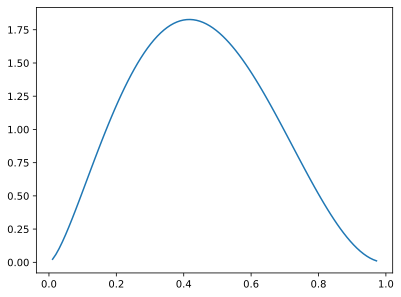

In [157]:
x = np.linspace(beta.ppf(0.0001, a, b), beta.ppf(0.9999, a, b), 100) # the ppf function returns a value for x that corresponds to whatever area
# of the function within a and b you're specifying (i.e. between 0.0001 and 0.9999, be careful with distributions like the gaussian not to use
# values such as the extremes of the interval because they are inf)
plt.plot(x, beta.pdf(x, a, b))

**Example 2:** Gaussian distribution

$\displaystyle f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(x - \mu)^2}{2 \sigma^2} \right)$

with $ x \in [-\infty, \infty]$

In [158]:
from scipy.stats import norm 

In [161]:
mu = 1
sigma = 2
mean, var =  norm.stats(loc=mu, scale=sigma, moments='mv')
print(mean)
print(var)

1.0
4.0


The Gaussian distribution is a normal distribution, shifted by $\mu$ and scaled by $\sigma$, as you can notice.

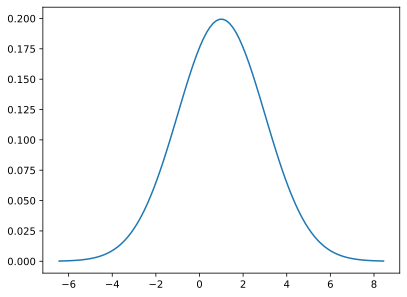

In [164]:
x = np.linspace(norm.ppf(0.0001, mu, sigma), norm.ppf(0.9999, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))

The `ppf` function is the inverse of the `cdf` (cumulative distribution function) and it can be very useful to specify the limits within which the distribution is concentrated. 

**Example 3:** Multinomial distribution

$\displaystyle f(x_1, \dots, x_k; p_1, \dots, p_k, n) = \frac{n!}{x_1! \dots x_k!} p_1^{x_1} \dots p_k^{x_k}$

Useful for discrete probability distributions, such as rolling a dice.

In [168]:
from scipy.stats import multinomial
P = np.ones(6)/6 # vector containing the probability for each face of the dice
multinomial.pmf([6,0,0,0,0,0], n=6, p=P) # returns the probability to get that specific combination

2.143347050754453e-05

In [169]:
multinomial.rvs(n=100, p=P, size=5)

array([[13, 16, 15, 26, 14, 16],
       [17, 16, 14, 12, 20, 21],
       [14, 15, 16, 23, 15, 17],
       [20, 18, 18, 14, 18, 12],
       [15, 16, 18, 11, 21, 19]])

Each line is a trial and each column is a possible outcome. For instance, the first line is the probability of getting 1, 2, 3, 4, 5 or 6 when rolling a dice, with a total of 100 rolls. 

**Example 4:** Generating random numbers from your own distribution

$f(x;a_1, a_2, b_1, b_2) = \displaystyle\frac{1}{2(a_1 b_1 + a_2 b_2)} \left( b_1 \exp \left( -\sqrt{\frac{x}{a_1}} \right) + b_2 \exp \left( -\sqrt{\frac{x}{a_2}} \right) \right)$ 

with $x \in [0, \infty)$

In [173]:
import scipy.stats as st 

class my_distribution(st.rv_continuous):
    def _pdf(self, x, a1, a2, b1, b2):
        return 1/(2*(a1*b1 + a2*b2)) * (b1 * np.exp(-np.sqrt(x/a1)) + b2 * np.exp(-np.sqrt(x/a2)))
    
distr = my_distribution(a=0, b=np.inf)

In [176]:
a1, a2, b1, b2 = 2, 3, 1, 2
x = np.linspace(distr.ppf(0.01, a1, a2, b1, b2), distr.ppf(0.99, a1, a2, b1, b2), 1000)
y = distr.pdf(x, a1, a2, b1, b2)

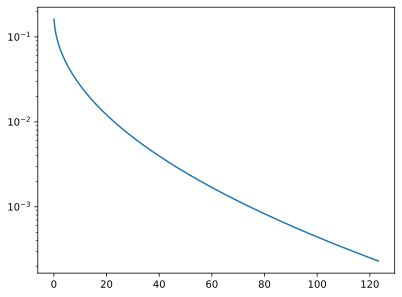

In [177]:
plt.plot(x, y)
plt.semilogy()
plt.show()

Generating random numbers from this specific custom distribution is very easy, since we can use the `rvs` function. 

However, this is not very efficient, so we can redefine any function inherited by our custom class, such as the `rvs` function itself. 

This is a very powerful feature of python, since our own custom classes can inherit any function from other classes and then we can redefine them as we want, while keeping everything confined within our own class.

In [178]:
class mr_p_solver_dist(st.rv_continuous):
    def pdf(self, x, al, a2, bl, b2):
        return 1/(2*(al*bl+a2*b2))*(bl*np.exp(-np.sqrt(x/al)) + b2*np.exp(-np.sqrt(x/a2)))
    
    def _cdf(self, x, al, a2, bl, b2):
        return 1/(2*(al*bl+a2*b2))*(-2*al*bl*(np.sqrt(x/al)+1)*np.exp(-np.sqrt(x/al))
                                    -2*a2*b2*(np.sqrt(x/a2)+1)*np.exp(-np.sqrt(x/a2))
                                    + 2*al*bl + 2*a2*b2)
    
    def _rvs(self, al, a2, bl, b2, delta=0.001, size=None, random_state=None):
        a_min = min([al, a2])
        x = np.linspace(0, a_min*np.log(1/delta)**2, 10000)
        r = st.uniform.rvs(size=size, random_state=random_state)
        return x[np.searchsorted(self._cdf(x[:-1], al, a2, bl, b2), r)]


In [179]:
my_rv = mr_p_solver_dist(a=0, b=np.inf)
my_rv._rvs(a1, a2, b1, b2, size=10000)

array([ 1.4507444 , 27.91728528, 31.63004561, ...,  8.34178029,
       95.43416599,  8.99079752])